# 確率分布の作図

- 執筆期間：2022/01/14 - 2022/01/1

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-16 05:44


<br>

# カテゴリ分布

　カテゴリ分布(Categorical Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import multinomial # 多項分布
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。  
<br>

## 定義式の確認

　サイコロのように複数の離散値$1, 2, \cdots, V$から1つの値をとる変数の確率分布をカテゴリ分布と言います。  
　サイコロの出目(得られたクラス)が$v$のとき、$v$番目の要素$x_v$が1でそれ以外の要素が0の$V$次元ベクトル$\mathbf{x} = (x_1, \cdots, x_V)$で表します。$\mathbf{x}$の各要素$x_v$が0か1の値をとることを$x_v \in \{0, 1\}$で表します。また、1つの要素のみが1なので$\sum_{v=1}^V x_v = 1$になります。  
　$x_v = 1$(クラス$v$・出目が$v$)となる確率を$\phi_v$で表すことにします。同様に、$\mathbf{x}$の各要素に対応する確率をまとめて、$\boldsymbol{\phi} = (\phi_1, \cdots, \phi_V)$と表記します。$\boldsymbol{\phi}$各要素は確率の定義より、$0 \leq \phi_v \leq 1$、$\sum_{v=1}^V \phi_v = 1$の条件を満たす必要があります。  

　カテゴリ分布は、パラメータ$\boldsymbol{\phi}$を用いて次の式で定義されます。

$$
\mathrm{Cat}(\boldsymbol{x} | \boldsymbol{\phi})
  = \prod_{v=1}^V
        \phi_v^{x_v}
$$

　この式は、例えばサイコロの出目が3、つまり$V = 6, x_3 = 1$のとき

$$
\begin{aligned}
\mathrm{Cat}(x_3 = 1 | \boldsymbol{\phi})
   &= \prod_{v=1}^6
          \phi_v^{x_v}
\\
   &= \phi_1^0 * \phi_2^0 * \phi_3^1 * \phi_4^0 * \phi_5^0 * \phi_6^0
\\
   &= 1 * 1 * \phi_3 * 1 * 1 * 1
\\
   &= \phi_3
\end{aligned}
$$

となります。$x^0 = 1$です。  
　このように、$x_v$に対応した確率$\phi_v$となるように式が定義されています。  

　また、クラス数が$V = 2$のとき、$\boldsymbol{\phi} = (\phi_1, \phi_2)$なので

$$
\begin{aligned}
\sum_{v=1}^2 \phi_v
   &= 1 \\
\phi_1 + \phi_2
   &= 1 \\
\phi_2
   &= 1 - \phi_1
\end{aligned}
$$

となります。同様に、$\mathbf{x} = (x_1, x_2)$なので

$$
\begin{aligned}
\sum_{v=1}^2 x_v
   &= 1 \\
x_1 + x_2
   &= 1 \\
x_2
   &= 1 - x_1
\end{aligned}
$$

となります。よって、$V = 2$のときのカテゴリ分布は

$$
\begin{aligned}
\mathrm{Cat}(x | \phi_1, \phi_2)
   &= \prod_{v=1}^2
          \phi_v^{x_v} \\
   &= \phi_1^{x_1} * \phi_2^{x_2} \\
   &= \phi_1^{x_1} (1 - \phi_1)^{1 - x_1}
        = \mathrm{Bern}(x | \phi_1)
\end{aligned}
$$

ベルヌーイ分布と等しくなります。  

　カテゴリ分布の対数をとると

$$
\log \mathrm{Cat}(\boldsymbol{x} | \boldsymbol{\phi})
  = \sum_{v=1}^V
        x_v \log \phi_v
$$

となります。対数の性質より$\log x^a = a \log x$です。  

　カテゴリ分布のクラス$v$における平均と分散は、次の式で計算できます。詳しくは「統計量の導出」を参照してください。

$$
\begin{aligned}
\mathbb{E}[x_v]
   &= \phi_v
\\
\mathbb{V}[x_v]
   &= \phi_v (1 - \phi_v)
\end{aligned}
$$

<br>

　これらの計算を行いグラフを作成します。  
<br>

## 確率の計算

　カテゴリ分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
phi_v = np.array([0.2, 0.4, 0.1, 0.3])

# 確率変数の値を指定
x_v = np.array([0, 1, 0, 0])

　カテゴリ分布のパラメータ$\boldsymbol{\phi} = (\phi_1, \cdots, \phi_V)$、$0 \leq \phi_v \leq 1$、$\sum_{v=1}^V \phi_v = 1$を指定します。  
　確率変数がとり得る値$\mathbf{x} = (x_1, \cdots, x_V)$、$x_v \in \{0, 1\}$、$\sum_{v=1}^V x_v = 1$を指定します。  

　まずは、定義式から確率を計算します。

In [4]:
# 定義式により確率を計算
prob = np.prod(phi_v**x_v)
print(prob)

0.4


　カテゴリ分布の定義式

$$
p(\boldsymbol{x} | \boldsymbol{\phi})
  = \prod_{v=1}^V
        \phi_v^{x_v}
$$

で計算します。  

　対数をとった定義式から確率を計算します。

In [5]:
# 対数をとった定義式により確率を計算
log_prob = np.sum(x_v * np.log(phi_v))
prob = np.exp(log_prob)
print(prob, log_prob)

0.4 -0.916290731874155


　対数をとった定義式

$$
\log p(\boldsymbol{x} | \boldsymbol{\phi})
  = \sum_{v=1}^V
        x_v \log \phi_v
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
p(x | \phi)
    = \exp \Bigr(
          \log p(x | \phi)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、関数を使って確率を計算します。  
　多項分布のモジュール`multinomial`の確率計算メソッド`pmf()`を使って計算します。

In [6]:
# 多項分布の関数により確率を計算
prob = multinomial.pmf(x=x_v, n=1, p=phi_v)
print(prob)

0.4


　試行回数の引数`n`に`1`を指定することで、カテゴリ分布の確率を計算できます。  
　出現頻度の引数`x`に`x_v`、出現確率の引数`p`に`phi_v`を指定します。  

　`logpmf()`だと対数をとった確率を返します。

In [7]:
# 多項分布の対数をとった関数により確率を計算
log_prob = multinomial.logpmf(x=x_v, n=1, p=phi_v)
prob = np.exp(log_prob)
print(prob, log_prob)

0.4 -0.916290731874155


　計算結果の指数をとると確率が得られます。  

　最後に、スライス機能を使って確率を取り出します。

In [8]:
# インデックスにより確率を抽出
v = np.where(x_v == 1)[0][0]
prob = phi_v[v]
print(prob)

0.4


　`np.where()`を使って、`x_v`から値が`1`の要素のインデックスを検索して`v`とします。  
　`phi_v`の`v`番目の要素を抽出します。  
<br>

## 統計量の計算

　カテゴリ分布の平均と分散を計算します。  
<br>

　クラス$v$の平均を計算します。

In [9]:
# クラスvの平均を計算
E_x = phi_v[v]
print(E_x)

0.4


　カテゴリ分布の平均は、次の式で計算できます。

$$
\mathbb{E}[x_v]
    = \phi_v
$$

　クラス$v$の分散を計算します。

In [10]:
# クラスvの分散を計算
V_x = phi_v[v] * (1.0 - phi_v[v])
print(V_x)

0.24


　カテゴリ分布の分散は、次の式で計算できます。

$$
\mathbb{V}[x_v]
    = \phi_v (1 - \phi_v)
$$

<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してカテゴリ分布のグラフを作成します。  
<br>

　カテゴリ分布の確率変数がとり得るクラス$v$と対応する確率を作成します。

In [11]:
# パラメータを指定
phi_v = np.array([0.2, 0.4, 0.1, 0.3])

# クラス数を取得
V = len(phi_v)

# 作図用のクラス番号を作成
v_vals = np.arange(1, V + 1)

# 分布を計算
probability = phi_v.copy()

　$\mathbf{x}$によって表されるクラス番号`1`から`V`を`v_vals`、各クラスに対応する確率`phi_v`を`probability`とします。  

　`multinomial.pmf()`でも計算できます。

In [12]:
# 多項分布の関数により分布を計算
probability = multinomial.pmf(x=np.identity(V), n=1, p=phi_v)
print(probability)

[0.2 0.4 0.1 0.3]


　単位行列`np.identity(V)`を使うことで、各クラスの確率`phi_v`を取り出せます。  

　カテゴリ分布のグラフを作成します。

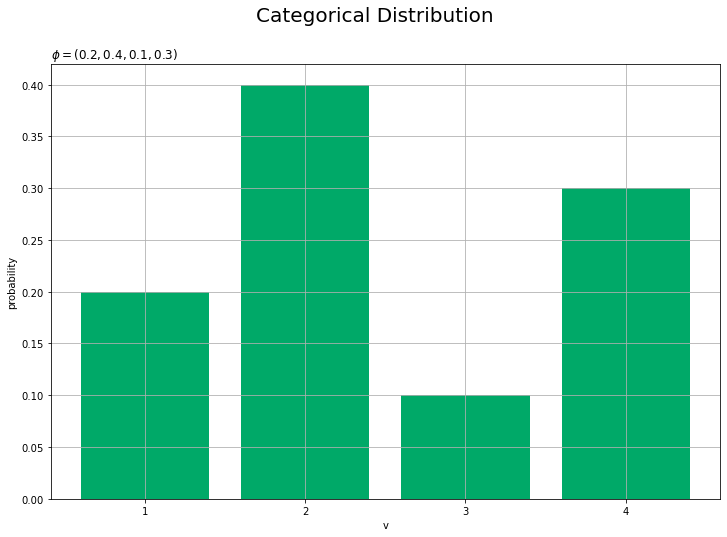

In [13]:
# カテゴリ分布を作図
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=v_vals, height=probability, color='#00A968') # 棒グラフ
plt.xlabel('v') # x軸ラベル
plt.ylabel('probability') # y軸ラベル
plt.suptitle('Categorical Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')$', loc='left') # タイトル
plt.xticks(ticks=v_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

　パラメータの値そのままですが、これがカテゴリ分布のグラフです。  
<br>

## パラメータと分布の形状の関係

　続いて、パラメータ$\phi_v$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


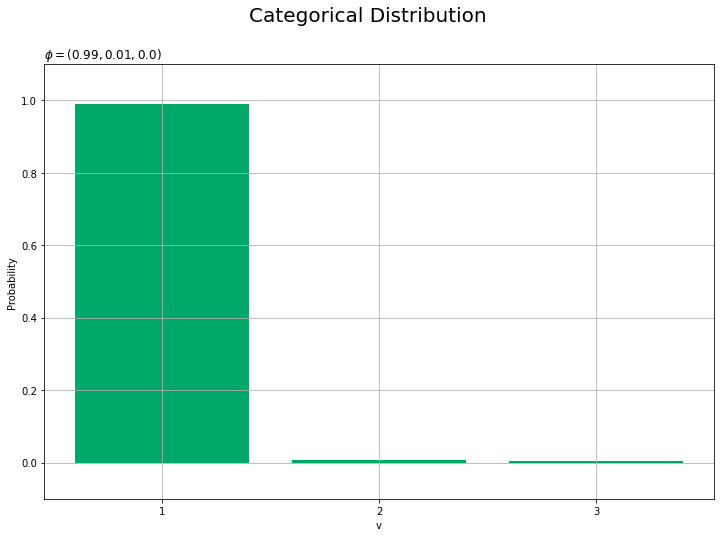

In [14]:
# 作図用のphi_1の値を作成
phi_vals = np.arange(start=0.0, stop=1.0, step=0.01)

# クラス数を指定
V = 3

# 作図用のクラス番号を作成
v_vals = np.arange(1, V + 1)

# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i回目のphi_1の値を取得
    phi_1 = phi_vals[i]
    
    # phi_1以外の割り当てを指定
    phi_v = np.array([phi_1, (1.0 - phi_1) * 0.6, (1.0 - phi_1) * 0.4])
    
    # カテゴリ分布を作図
    plt.bar(x=v_vals, height=phi_v, color='#00A968', zorder=1) # 棒グラフ
    plt.xlabel('v') # x軸ラベル
    plt.ylabel('Probability') # y軸ラベル
    plt.suptitle('Categorical Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=(' + ', '.join([str(phi) for phi in np.round(phi_v, 2)]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=v_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(phi_vals), interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Categorical_prob.gif')

　$\phi_1$がとり得る値を作成して`phi_vals`とします。  
　`phi_vals`の値ごとに`phi_v`を更新して作図します。$\phi_1$以外の確率の和$1 - \phi_1$を他のクラスの確率として割り振ります。  

　(定義のままですが、)パラメータ$\phi_1$の値が大きいほど、$x_1 = 1$となる確率が高く、他のクラスとなる確率が低いを確認できます。  
<br>

## 乱数の生成

　カテゴリ分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、カテゴリ分布に従う乱数を生成します。

In [15]:
# パラメータを指定
phi_v = np.array([0.2, 0.4, 0.1, 0.3])

# クラス数を取得
V = len(phi_v)

# 作図用のクラス番号を作成
v_vals = np.arange(1, V + 1)

# データ数を指定
N = 1000

# カテゴリ分布に従う乱数を生成
x_nv = np.random.multinomial(n=1, pvals=phi_v, size=N)
print(x_nv[:5])

[[0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]


　多項分布の乱数生成関数`np.random.multinomial()`の試行回数の引数`n `に`1`を指定することで、カテゴリ分布に従う乱数を生成できます。  
　成功確率の引数`pvals`に`phi`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　各データに割り当てられたクラス番号を抽出します。

In [16]:
# クラス番号を抽出
x_n = np.where(x_nv == 1)[1]
print(x_n[:5])

[1 0 1 3 1]


　`np.where()`を使って、`x_nv`の各行から値が`1`の列番号を抽出できます。ここでは`x_n`は使いません。  

　サンプルの値を集計します。

In [17]:
# 乱数を集計
frequency = np.sum(x_nv, axis=0)
print(frequency)

[198 424  80 298]


　`x_nv`の各列に含まれる`1`の要素数は、`np.sum(x_n == 0, axis=0)`で得られます。  

　ヒストグラムを作成します。

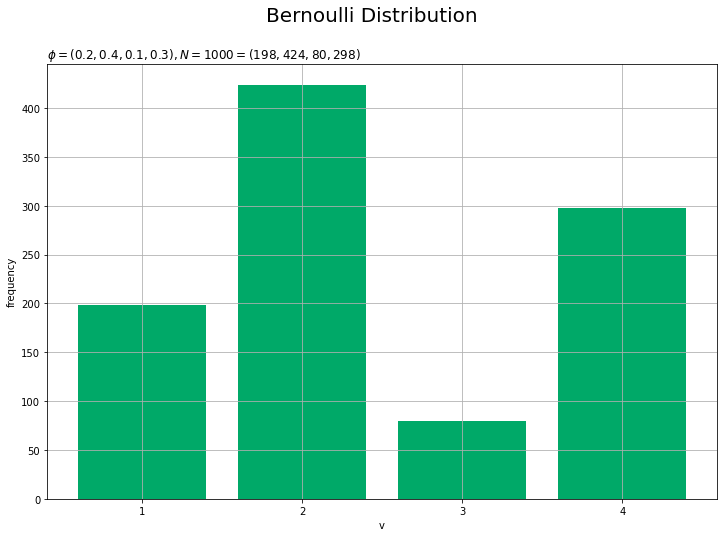

In [18]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=v_vals, height=frequency, color='#00A968') # ヒストグラム
plt.xlabel('v') # x軸ラベル
plt.ylabel('frequency') # y軸ラベル
plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
          ', N=' + str(N) +'=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=v_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

<br>

　構成比を分布と重ねて描画します。

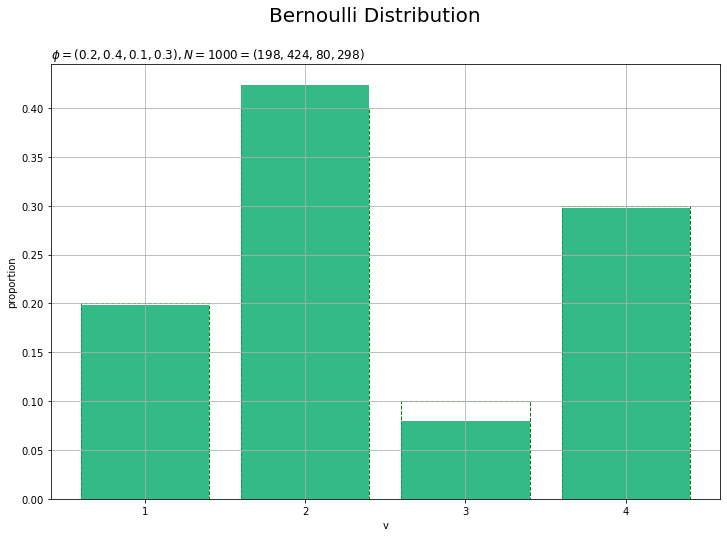

In [19]:
# サンプルの構成比を作図
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=v_vals, height=probability, color='white', edgecolor='green', linestyle='--') # 分布
plt.bar(x=v_vals, height=frequency / N, color='#00A968', alpha=0.8) # 構成比
plt.xlabel('v') # x軸ラベル
plt.ylabel('proportion') # y軸ラベル
plt.suptitle('Bernoulli Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
          ', N=' + str(N) +'=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=v_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

　各クラスの頻度`frequency`をデータ数`N`で割り、`0`と`1`の構成比を計算します。  

　データ数が十分に増えると分布に形が近づきます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。  

MovieWriter ffmpeg unavailable; using Pillow instead.


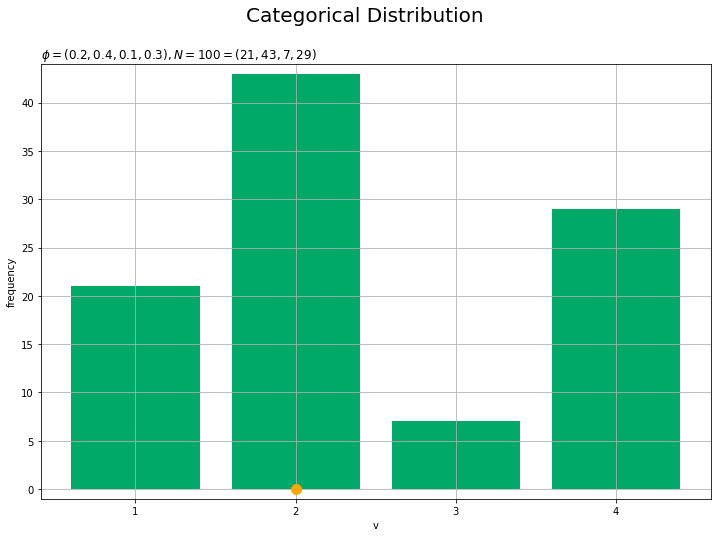

In [20]:
# フレーム数を指定
N = 100

# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 頻度の最大値を取得
y_max = np.max(np.sum(x_nv[:N], axis=0))

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.sum(x_nv[:(n+1)], axis=0)
    
    # n番目の乱数のクラスを取得
    x_val = np.where(x_nv[n] == 1)[0][0] + 1
    
    # サンプルのヒストグラムを作成
    plt.bar(x=v_vals, height=frequency, color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x=x_val, y=0.0, color='orange', s=100, zorder=2) # サンプル
    plt.xlabel('v') # x軸ラベル
    plt.ylabel('frequency') # y軸ラベル
    plt.suptitle('Categorical Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
              ', N=' + str(n + 1) +'=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=v_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-1.0, y_max + 1.0) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Categorical_freq.gif')

<br>

　構成比のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


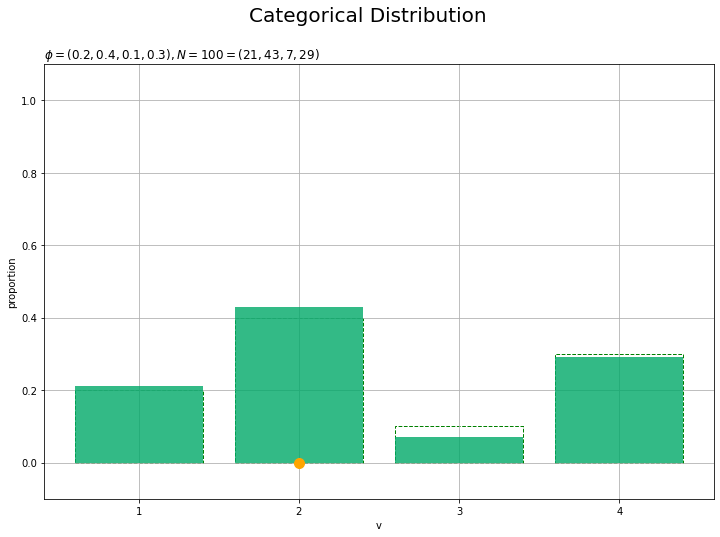

In [21]:
# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.sum(x_nv[:(n+1)], axis=0)
    
    # n番目の乱数のクラスを取得
    x_val = np.where(x_nv[n] == 1)[0][0] + 1
    
    # サンプルの構成比を作成
    plt.bar(x=v_vals, height=probability, color='white', edgecolor='green', linestyle='--', zorder=1) # 分布
    plt.bar(x=v_vals, height=frequency / (n + 1), color='#00A968', alpha=0.8, zorder=2) # 構成比
    plt.scatter(x=x_val, y=0.0, color='orange', s=100, zorder=3) # サンプル
    plt.xlabel('v') # x軸ラベル
    plt.ylabel('proportion') # y軸ラベル
    plt.suptitle('Categorical Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
              ', N=' + str(n + 1) +'=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=v_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Categorical_prop.gif')

　サンプルが増えるに従って、真の分布に近付いていくのを確認できます。  

　以上で、カテゴリ分布を確認できました。  
<br>